In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re

In [2]:
jan6=pd.read_excel('whatsapp_data/jan6.xlsx')

In [3]:
jan6

,Название учётной записи,Traffic Source,Название коммуникации,Communication Scheduled For,Дата начала коммуникации,Шаблон коммуникации,От,Получатель,Код сообщения,Отправлено в,...,Название ошибки,Время завершения обработки,Текст,Количество сообщений,Название сервиса,User Name,Просмотрено в,Клики,Paired Message Id,Пользовательские данные
0,Kazakhtelecom,Other,NaN,NaN,NaN,NaN,77080000160,77772385270,277162909114443579,29/01/2021 15:11:44,...,No Error (code 0),29/01/2021 15:11:45,IMAGE - https://d1ygi81q02zqx0.cloudfront.net/...,1,WhatsApp Outbound,Berikkyzy.B (Балжан Берикызы),29/01/2021 16:44:42,NaN,NaN,NaN
1,Kazakhtelecom,Other,NaN,NaN,NaN,NaN,77080000160,77026328473,154222909114518286,29/01/2021 15:11:45,...,No Error (code 0),29/01/2021 15:11:45,Здравствуйте меня зовут Мирас чем я могу вам п...,1,WhatsApp Outbound,Tishpaev.M (Мирас Тишпаев),29/01/2021 15:11:45,NaN,NaN,NaN
2,Kazakhtelecom,Other,NaN,NaN,NaN,NaN,77080000160,77057231138,277122909114601462,29/01/2021 15:11:46,...,No Error (code 0),29/01/2021 15:11:46,пишите на листке и отправляете нам фото↲Генера...,1,WhatsApp Outbound,Karlina.O (Ольга Карлина),29/01/2021 15:11:46,NaN,NaN,NaN
3,Kazakhtelecom,Other,NaN,NaN,NaN,NaN,77080000160,77751547677,585512909114603601,29/01/2021 15:11:46,...,No Error (code 0),29/01/2021 15:11:46,Қызметтерді қосу үшін келесі ақпараттарды жібе...,1,WhatsApp Outbound,nysanbai.kamila (Кәмилә Нысанбай),29/01/2021 15:11:46,NaN,NaN,NaN
4,Kazakhtelecom,API,NaN,NaN,NaN,NaN,77073648007,77080000160,ABGGdwc2SAB_AhD5U-lRpBAWBCykDnNUyGqT,29/01/2021 15:11:46,...,No Error (code 0),29/01/2021 15:11:46,165,1,WhatsApp Inbound,dana.bainazarova (Dana Bainazarova),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158083,Kazakhtelecom,Customer Portal,Pavlodar 160 add 29/12/2020,Immediate,13/01/2021 08:48:12,NaN,77080000160,77750000727,612013117594637298,31/01/2021 23:59:46,...,No Error (code 0),31/01/2021 23:59:48,Спасибо за обращение! Вы можете обратиться к н...,1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),01/02/2021 00:47:14,NaN,NaN,NaN
158084,Kazakhtelecom,API,Pavlodar 160 add 29/12/2020,Immediate,13/01/2021 08:48:12,NaN,77788786888,77080000160,ABGGd3iHhoiPAhAWFqTOEvyXwc8-W6t6lQQF,31/01/2021 23:59:48,...,No Error (code 0),31/01/2021 23:59:48,*,1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN
158085,Kazakhtelecom,Customer Portal,Pavlodar 160 add 29/12/2020,Immediate,13/01/2021 08:48:12,NaN,77080000160,77788786888,612613117594894808,31/01/2021 23:59:48,...,No Error (code 0),31/01/2021 23:59:49,"Выберите, пожалуйста, по какому вопросу Вы обр...",1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),31/01/2021 23:59:49,NaN,NaN,NaN
158086,Kazakhtelecom,API,Pavlodar 160 add 29/12/2020,Immediate,13/01/2021 08:48:12,NaN,77788786888,77080000160,ABGGd3iHhoiPAhCsqdFHmfPAdd6_l2NASvlC,31/01/2021 23:59:55,...,No Error (code 0),31/01/2021 23:59:55,4,1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN


In [4]:
jan1=pd.read_excel('whatsapp_data/jan1.xlsx')

In [5]:
jan1

,Название учётной записи,Traffic Source,Название коммуникации,Communication Scheduled For,Дата начала коммуникации,Шаблон коммуникации,От,Получатель,Код сообщения,Отправлено в,...,Название ошибки,Время завершения обработки,Текст,Количество сообщений,Название сервиса,User Name,Просмотрено в,Клики,Paired Message Id,Пользовательские данные
0,Kazakhtelecom,API,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77052917219,77080000160,ABGGdwUpFyGfAhAwP96p3dON0QE--ndEToNx,01/01/2021 00:01:13,...,No Error (code 0),01/01/2021 00:01:13,", здравствуйте",1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN
1,Kazakhtelecom,Customer Portal,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77080000160,77052917219,612323118011409768,01/01/2021 00:01:14,...,No Error (code 0),01/01/2021 00:01:15,Қазақтелеком Cізді қарсы алады. Қош келдіңіз! ...,1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),01/01/2021 00:01:15,NaN,NaN,NaN
2,Kazakhtelecom,Customer Portal,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77080000160,77052917219,612423118011410927,01/01/2021 00:01:14,...,No Error (code 0),01/01/2021 00:01:15,"Диалогты жалғастыра отырып, сіз өз хабарламала...",1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),01/01/2021 00:01:15,NaN,NaN,NaN
3,Kazakhtelecom,Customer Portal,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77080000160,77052917219,277153118011426587,01/01/2021 00:01:14,...,No Error (code 0),01/01/2021 00:01:15,1️⃣ - Қазақ тілін таңдау үшін↲2️⃣ - Для выбора...,1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),01/01/2021 00:01:15,NaN,NaN,NaN
4,Kazakhtelecom,API,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77052917219,77080000160,ABGGdwUpFyGfAhB6X5thkOw6nnJV7UZSMPzO,01/01/2021 00:01:32,...,No Error (code 0),01/01/2021 00:01:32,2,1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524282,Kazakhtelecom,API,NaN,NaN,NaN,NaN,77470637040,77080000160,ABGGd0cGNwQPAgo64YQucaOUfm49,08/01/2021 09:25:23,...,No Error (code 0),08/01/2021 09:25:23,IMAGE - https://api.infobip.com/whatsapp/1/sen...,1,WhatsApp Inbound,dana.bainazarova (Dana Bainazarova),NaN,NaN,NaN,NaN
524283,Kazakhtelecom,API,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77770767367,77080000160,ABGGd3cHZzZ_Ago6UGFdDl0AKd3b,08/01/2021 09:25:24,...,No Error (code 0),08/01/2021 09:25:24,*,1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN
524284,Kazakhtelecom,Customer Portal,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77080000160,77770767367,277170803252468363,08/01/2021 09:25:24,...,No Error (code 0),08/01/2021 09:25:25,"Құрметті клиент, сұраныстарды жедел өңдеу үшін...",1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),08/01/2021 09:25:25,NaN,NaN,NaN
524285,Kazakhtelecom,API,NaN,NaN,NaN,NaN,77752222350,77080000160,ABGGd3UiIjUPAgo6wxQmrk5sesy1,08/01/2021 09:25:28,...,No Error (code 0),08/01/2021 09:25:28,Здравствуйте,1,WhatsApp Inbound,dana.bainazarova (Dana Bainazarova),NaN,NaN,NaN,NaN


In [6]:
jan2=pd.read_excel('whatsapp_data/jan2.xlsx')

In [7]:
jan2

,Название учётной записи,Traffic Source,Название коммуникации,Communication Scheduled For,Дата начала коммуникации,Шаблон коммуникации,От,Получатель,Код сообщения,Отправлено в,...,Название ошибки,Время завершения обработки,Текст,Количество сообщений,Название сервиса,User Name,Просмотрено в,Клики,Paired Message Id,Пользовательские данные
0,Kazakhtelecom,Other,NaN,NaN,NaN,NaN,77080000160,77078099242,612110803253495428,08/01/2021 09:25:34,...,No Error (code 0),08/01/2021 09:25:35,Да конечно! Можно переоформить через онлайн чат,1,WhatsApp Outbound,Ali.a (ӘЛИ АҚЫН),08/01/2021 09:25:36,NaN,NaN,NaN
1,Kazakhtelecom,Other,NaN,NaN,NaN,NaN,77080000160,77019088904,154220803253700591,08/01/2021 09:25:37,...,No Error (code 0),08/01/2021 09:25:40,отправьте пожалуйста удостоверение с двух сторон,1,WhatsApp Outbound,Ishanov.a (Алишер Ишанов),08/01/2021 12:31:58,NaN,NaN,NaN
2,Kazakhtelecom,Other,NaN,NaN,NaN,NaN,77080000160,77470637040,612410803253738691,08/01/2021 09:25:37,...,No Error (code 0),08/01/2021 09:25:38,ИИН?,1,WhatsApp Outbound,Targynova (Акку Таргынова),08/01/2021 09:25:38,NaN,NaN,NaN
3,Kazakhtelecom,API,NaN,NaN,NaN,NaN,77470637040,77080000160,ABGGd0cGNwQPAgo6boyzpReBnbzj,08/01/2021 09:25:37,...,No Error (code 0),08/01/2021 09:25:37,Спасибо,1,WhatsApp Inbound,dana.bainazarova (Dana Bainazarova),NaN,NaN,NaN,NaN
4,Kazakhtelecom,API,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77005000988,77080000160,ABGGdwBQAJiPAhC4qs7v3aW_25q2NYPDVAT2,08/01/2021 09:25:38,...,No Error (code 0),08/01/2021 09:25:38,2,1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524282,Kazakhtelecom,Other,NaN,NaN,NaN,NaN,77080000160,77753033075,612411307444684153,13/01/2021 13:44:46,...,No Error (code 0),13/01/2021 13:44:48,Добрый день! Как мы можем Вам помочь?,1,WhatsApp Outbound,Ilipbai.M (Мейржан Илипбай),13/01/2021 14:09:14,NaN,NaN,NaN
524283,Kazakhtelecom,Other,NaN,NaN,NaN,NaN,77080000160,77773122969,154191307444736805,13/01/2021 13:44:47,...,No Error (code 0),13/01/2021 13:44:48,Спасибо за обращение! Всего доброго!,1,WhatsApp Outbound,RAKHIMOVA.GL (Гульжан Рахимова),NaN,NaN,NaN,NaN
524284,Kazakhtelecom,API,Pavlodar 160 add 29/12/2020,Immediate,13/01/2021 08:48:12,NaN,77028481044,77080000160,ABGGdwKEgQRPAhB-OFetLk49Fxbyylam2wsY,13/01/2021 13:44:48,...,No Error (code 0),13/01/2021 13:44:48,3,1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN
524285,Kazakhtelecom,API,Pavlodar 160 add 29/12/2020,Immediate,13/01/2021 08:48:12,NaN,77766309080,77080000160,ABGGd3ZjCQgPAhBZNXTaX8DVTvDPksNoMK9J,13/01/2021 13:44:48,...,No Error (code 0),13/01/2021 13:44:48,4,1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN


In [ ]:
#jan3=pd.read_excel('whatsapp_data/jan3.xlsx')


In [ ]:
#jan4=pd.read_excel('whatsapp_data/jan4.xlsx')

In [ ]:
#jan5=pd.read_excel('whatsapp_data/jan5.xlsx')

In [5]:
jan_126= pd.concat([jan1,jan6],ignore_index=True)

In [6]:
jan_126

,Название учётной записи,Traffic Source,Название коммуникации,Communication Scheduled For,Дата начала коммуникации,Шаблон коммуникации,От,Получатель,Код сообщения,Отправлено в,...,Название ошибки,Время завершения обработки,Текст,Количество сообщений,Название сервиса,User Name,Просмотрено в,Клики,Paired Message Id,Пользовательские данные
0,Kazakhtelecom,API,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77052917219,77080000160,ABGGdwUpFyGfAhAwP96p3dON0QE--ndEToNx,01/01/2021 00:01:13,...,No Error (code 0),01/01/2021 00:01:13,", здравствуйте",1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN
1,Kazakhtelecom,Customer Portal,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77080000160,77052917219,612323118011409768,01/01/2021 00:01:14,...,No Error (code 0),01/01/2021 00:01:15,Қазақтелеком Cізді қарсы алады. Қош келдіңіз! ...,1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),01/01/2021 00:01:15,NaN,NaN,NaN
2,Kazakhtelecom,Customer Portal,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77080000160,77052917219,612423118011410927,01/01/2021 00:01:14,...,No Error (code 0),01/01/2021 00:01:15,"Диалогты жалғастыра отырып, сіз өз хабарламала...",1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),01/01/2021 00:01:15,NaN,NaN,NaN
3,Kazakhtelecom,Customer Portal,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77080000160,77052917219,277153118011426587,01/01/2021 00:01:14,...,No Error (code 0),01/01/2021 00:01:15,1️⃣ - Қазақ тілін таңдау үшін↲2️⃣ - Для выбора...,1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),01/01/2021 00:01:15,NaN,NaN,NaN
4,Kazakhtelecom,API,Shymkent 160 add 29/12/2020,Immediate,30/12/2020 03:01:24,NaN,77052917219,77080000160,ABGGdwUpFyGfAhB6X5thkOw6nnJV7UZSMPzO,01/01/2021 00:01:32,...,No Error (code 0),01/01/2021 00:01:32,2,1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682370,Kazakhtelecom,Customer Portal,Pavlodar 160 add 29/12/2020,Immediate,13/01/2021 08:48:12,NaN,77080000160,77750000727,612013117594637298,31/01/2021 23:59:46,...,No Error (code 0),31/01/2021 23:59:48,Спасибо за обращение! Вы можете обратиться к н...,1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),01/02/2021 00:47:14,NaN,NaN,NaN
682371,Kazakhtelecom,API,Pavlodar 160 add 29/12/2020,Immediate,13/01/2021 08:48:12,NaN,77788786888,77080000160,ABGGd3iHhoiPAhAWFqTOEvyXwc8-W6t6lQQF,31/01/2021 23:59:48,...,No Error (code 0),31/01/2021 23:59:48,*,1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN
682372,Kazakhtelecom,Customer Portal,Pavlodar 160 add 29/12/2020,Immediate,13/01/2021 08:48:12,NaN,77080000160,77788786888,612613117594894808,31/01/2021 23:59:48,...,No Error (code 0),31/01/2021 23:59:49,"Выберите, пожалуйста, по какому вопросу Вы обр...",1,WhatsApp Outbound,Kanat.Ospanov (Канат Оспанов),31/01/2021 23:59:49,NaN,NaN,NaN
682373,Kazakhtelecom,API,Pavlodar 160 add 29/12/2020,Immediate,13/01/2021 08:48:12,NaN,77788786888,77080000160,ABGGd3iHhoiPAhCsqdFHmfPAdd6_l2NASvlC,31/01/2021 23:59:55,...,No Error (code 0),31/01/2021 23:59:55,4,1,WhatsApp Inbound,Kanat.Ospanov (Канат Оспанов),NaN,NaN,NaN,NaN


In [37]:

jan_126['Название сети'].value_counts()

K-Cell (GSM Kazakhstan Ltd)           479260
Beeline (KaR-Tel LLP)                 346209
Tele2 (Mobile Telecom Service LLP)    254099
Altel JSC                             117330
MTS (Mobile TeleSystems)                1557
                                       ...  
MNO - Tele2 Sverige AB                    17
Rogers Wireless                           15
Rogers Wireless - Fido                    11
IDEA // Delhi                              6
Vodafone Germany                           6
Name: Название сети, Length: 73, dtype: int64

In [55]:
other =0
summa = 0
a = []
for i in jan_126['Название сети'].value_counts():
    summa= summa+i
    if (i >=10000):
        a.append(i)
    else:
        other = other+i
a.append(other)
print(a)
print(summa)

[479260, 346209, 254099, 117330, 9764]
1206662


In [57]:
k = []
for i in a:
    p=i*100/summa
    k.append(p)
print(k)

[39.717833162890685, 28.69146455262534, 21.058009616611777, 9.723518267750206, 0.8091744001219894]


<function matplotlib.pyplot.show(close=None, block=None)>

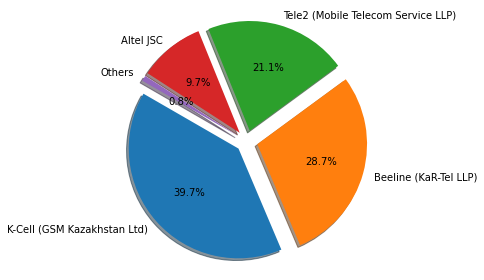

In [71]:
labels = ['K-Cell (GSM Kazakhstan Ltd)','Beeline (KaR-Tel LLP)','Tele2 (Mobile Telecom Service LLP)','Altel JSC','Others']
sizes = [39.717833162890685, 28.69146455262534, 21.058009616611777, 9.723518267750206, 0.8091744001219894]

explode = (0.1,0.1,0.1,0.1,0.1)

fig1,ax1=plt.subplots()
ax1.pie(sizes,explode = explode,labels = labels, autopct = '%1.1f%%', shadow=True,startangle =150)
ax1.axis('equal')
plt.tight_layout()
plt.show

In [21]:
jan_126.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206662 entries, 0 to 1206661
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Название учётной записи      1206662 non-null  object 
 1   Traffic Source               1206662 non-null  object 
 2   Название коммуникации        767244 non-null   object 
 3   Communication Scheduled For  767244 non-null   object 
 4   Дата начала коммуникации     767244 non-null   object 
 5   Шаблон коммуникации          0 non-null        float64
 6   От                           1206662 non-null  int64  
 7   Получатель                   1206662 non-null  int64  
 8   Код сообщения                1206662 non-null  object 
 9   Отправлено в                 1206662 non-null  object 
 10  Префикс страны               1206662 non-null  int64  
 11  Название страны              1206662 non-null  object 
 12  Название сети                1206662 non-n

In [7]:
jan_126['Отправлено в'] = pd.to_datetime(jan_126['Отправлено в'])

In [8]:
jan_126['Просмотрено в'] = pd.to_datetime(jan_126['Просмотрено в'])

In [9]:
jan_126.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682375 entries, 0 to 682374
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Название учётной записи      682375 non-null  object        
 1   Traffic Source               682375 non-null  object        
 2   Название коммуникации        442537 non-null  object        
 3   Communication Scheduled For  442537 non-null  object        
 4   Дата начала коммуникации     442537 non-null  object        
 5   Шаблон коммуникации          0 non-null       float64       
 6   От                           682375 non-null  int64         
 7   Получатель                   682375 non-null  int64         
 8   Код сообщения                682375 non-null  object        
 9   Отправлено в                 682375 non-null  datetime64[ns]
 10  Префикс страны               682375 non-null  int64         
 11  Название страны           

In [15]:
jan_126.isnull().sum()

Название учётной записи              0
Traffic Source                       0
Название коммуникации           439418
Communication Scheduled For     439418
Дата начала коммуникации        439418
Шаблон коммуникации            1206662
От                                   0
Получатель                           0
Код сообщения                        0
Отправлено в                         0
Префикс страны                       0
Название страны                      0
Название сети                        0
Цена покупки                         0
Статус                               0
Причина                              0
Действие                       1206662
Группа ошибок                        0
Название ошибки                      0
Время завершения обработки           0
Текст                                0
Количество сообщений                 0
Название сервиса                     0
User Name                            0
Просмотрено в                   587485
Клики                    

In [12]:
sec = jan_126['Отправлено в'].dt.date.value_counts()

In [13]:
sec

2021-05-01    151675
2021-12-01    129604
2021-11-01    127310
2021-08-01    114469
2021-06-01    114064
2021-04-01     77920
2021-07-01     70353
2021-09-01     68703
2021-01-30     68312
2021-03-01     47486
2021-01-29     47432
2021-01-13     44190
2021-10-01     43854
2021-02-01     42945
2021-01-31     42344
2021-01-01     16001
Name: Отправлено в, dtype: int64

In [31]:
jan6['Время завершения обработки'].dt.time# - jan6['Отправлено в'].dt.time

0         15:11:45
1         15:11:45
2         15:11:46
3         15:11:46
4         15:11:46
            ...   
158083    23:59:48
158084    23:59:48
158085    23:59:49
158086    23:59:55
158087    23:59:56
Name: Время завершения обработки, Length: 158088, dtype: object

In [48]:
df_new =  pd.DataFrame(jan_126['Отправлено в'].dt.date)

In [49]:
df_new

,Отправлено в
0,2021-01-01
1,2021-01-01
2,2021-01-01
3,2021-01-01
4,2021-01-01
...,...
682370,2021-01-31
682371,2021-01-31
682372,2021-01-31
682373,2021-01-31


In [61]:
if(jan_126['Просмотрено в'][1]<jan_126['Просмотрено в'][1255]):
    print ('uuu')

uuu


In [50]:
for i,j in jan_126['Просмотрено в'].items():
    if(pd.isna(j)==True):
        df_new.loc[i, 'time'] = 0
    if(j>jan_126['Отправлено в'][i]):
            df_new.loc[i, 'time'] = j - jan_126['Отправлено в'][i]
    else:
        df_new.loc[i, 'time'] = 0
    

In [51]:
for i , j in df_new['time'].items():
    if(j==0):
        continue
    if(j.days>0 ):
        print(i,j)

7 24 days 23:34:35
42 334 days 13:40:39
127 90 days 13:11:20
182 28 days 21:05:59
704 90 days 07:57:02
1412 31 days 11:55:10
1491 31 days 10:55:09
1769 59 days 12:20:10
2118 59 days 11:20:10
2347 31 days 08:42:51
3079 31 days 07:42:50
4565 212 days 10:46:02
4566 212 days 10:46:02
4567 212 days 10:46:01
4571 212 days 10:45:52
4572 212 days 10:45:51
4578 212 days 10:45:48
4580 212 days 10:45:42
4585 212 days 10:45:33
4595 212 days 10:45:26
4989 90 days 00:01:09
4990 90 days 00:01:09
4991 90 days 00:01:09
5001 90 days 00:00:48
5002 90 days 00:00:47
5004 90 days 00:00:38
5010 90 days 00:00:24
5943 58 days 21:56:23
6495 89 days 23:00:23
6549 30 days 09:50:50
6685 59 days 02:53:59
7934 89 days 22:00:22
8135 59 days 01:53:59
8597 303 days 08:13:54
8598 303 days 08:13:54
8599 303 days 08:13:54
8603 303 days 08:13:46
8604 303 days 08:13:46
8608 303 days 08:13:43
8614 303 days 08:13:20
8618 303 days 08:13:18
8622 303 days 08:13:08
8624 303 days 08:13:04
9168 30 days 20:05:06
10300 30 days 19:05:

120547 29 days 21:27:01
120694 30 days 05:49:43
120720 29 days 21:25:22
125945 29 days 14:42:59
126849 29 days 15:18:15
128683 30 days 04:49:42
129051 61 days 06:29:18
129052 61 days 06:29:18
129053 61 days 06:29:18
129097 61 days 06:29:01
129099 61 days 06:29:01
129112 61 days 06:28:53
129128 61 days 06:28:45
129144 61 days 06:28:37
129149 61 days 06:28:34
129336 61 days 06:27:29
129818 61 days 06:22:46
130128 61 days 06:20:09
132904 182 days 23:01:48
133740 29 days 22:38:49
134992 29 days 23:00:49
137218 60 days 10:18:36
138318 30 days 05:13:23
138674 91 days 08:16:13
140096 29 days 19:36:49
142884 61 days 01:27:18
143808 29 days 20:30:55
143826 29 days 20:30:51
144168 29 days 10:30:32
144418 60 days 09:18:35
147269 61 days 04:17:59
149589 29 days 17:51:02
149681 29 days 17:50:27
150338 153 days 06:31:42
150759 30 days 00:05:25
151119 30 days 07:19:58
151474 61 days 03:30:08
151741 61 days 03:28:16
151918 29 days 17:31:17
152685 29 days 17:25:19
154580 29 days 08:55:35
155260 30 days

322885 61 days 02:12:55
322912 30 days 04:31:00
323034 30 days 09:28:29
323221 30 days 11:35:51
323233 30 days 13:37:46
323237 61 days 02:10:05
323332 30 days 04:01:45
323585 30 days 10:54:01
323594 30 days 10:03:09
323647 30 days 20:39:15
323770 123 days 00:00:55
323826 30 days 12:31:09
324228 30 days 16:02:06
324302 30 days 16:52:46
324400 30 days 13:37:00
324411 30 days 13:36:56
324421 30 days 13:36:52
324464 30 days 03:30:25
324496 30 days 12:21:16
324543 30 days 13:47:05
324683 30 days 15:56:27
324690 30 days 03:45:13
324757 30 days 20:33:05
324773 30 days 05:22:58
324794 30 days 04:27:57
324964 30 days 10:42:22
324968 91 days 22:42:11
324973 30 days 07:58:17
324991 91 days 22:42:04
325004 30 days 14:00:12
325366 152 days 22:05:33
325386 152 days 22:05:16
325454 30 days 04:08:32
325465 184 days 01:56:18
325806 30 days 09:52:56
325903 30 days 09:51:55
326015 30 days 12:41:31
326115 30 days 16:59:52
326159 30 days 11:30:42
326302 30 days 04:10:13
326364 30 days 04:28:49
326379 30 da

381337 29 days 22:29:13
381741 29 days 19:57:01
382404 29 days 12:02:30
383273 92 days 01:48:21
383445 29 days 19:55:34
383518 29 days 20:19:54
385597 182 days 19:39:01
385641 182 days 19:38:39
385658 182 days 19:38:29
386563 152 days 21:43:40
386615 29 days 19:15:04
388093 61 days 03:10:43
388144 61 days 03:10:42
388174 61 days 03:10:42
388200 29 days 09:54:42
388220 29 days 09:54:42
388243 61 days 04:27:35
388250 29 days 09:54:41
388450 29 days 10:17:37
388461 29 days 10:17:36
388462 29 days 10:17:36
388485 29 days 22:44:30
388489 29 days 22:44:30
388496 29 days 22:44:29
388639 29 days 22:44:22
388768 61 days 04:27:10
388774 61 days 04:27:10
389071 29 days 22:43:50
389537 29 days 22:43:17
389745 29 days 08:39:21
389748 29 days 08:39:21
389751 29 days 08:39:21
390096 61 days 04:25:39
390651 29 days 10:15:12
390942 29 days 21:29:12
390990 29 days 08:38:00
391203 29 days 10:14:30
392353 29 days 08:20:42
392357 29 days 08:20:42
392359 29 days 08:20:42
392457 29 days 23:04:22
392459 29 da

509827 30 days 17:00:04
509836 30 days 16:59:46
509849 30 days 16:59:35
509854 30 days 16:59:29
509868 30 days 16:59:16
509894 30 days 16:58:45
509905 30 days 16:58:44
509906 30 days 16:58:44
509907 30 days 16:58:44
509909 30 days 16:58:44
509911 30 days 16:58:43
509913 30 days 16:58:42
509917 30 days 16:58:42
509919 30 days 16:58:41
509921 30 days 16:58:40
509923 30 days 16:58:40
509960 30 days 16:58:08
509969 30 days 16:58:00
509973 30 days 22:46:28
509982 30 days 16:57:44
510038 31 days 02:08:27
510055 30 days 06:34:20
510086 30 days 05:14:00
510124 30 days 17:34:42
510279 30 days 05:58:19
510294 30 days 16:52:42
510312 30 days 17:58:14
510321 30 days 16:52:22
510329 30 days 15:01:05
510338 30 days 16:52:05
510361 61 days 14:05:49
510375 30 days 16:51:34
510381 30 days 16:51:31
510382 30 days 16:51:31
510391 30 days 16:51:24
510400 30 days 16:51:18
510412 30 days 16:51:02
510417 30 days 21:01:45
510422 30 days 16:50:53
510491 30 days 13:49:32
510507 30 days 04:56:29
510621 30 days 1

In [54]:
for i , j in df_new['time'].items():
    if(j==0):
        pass
    if(j!=0 and j.days>0):
        df_new.loc[i, 'time'] = 0
    else:
        pass

In [55]:
for i , j in df_new['time'].items():
    if(j==0):
        continue
    if(j.days>0 ):
        print(i,j)

In [45]:
df_new

,Отправлено в,time
0,2021-01-01,0
1,2021-01-01,1
2,2021-01-01,1
3,2021-01-01,1
4,2021-01-01,0
...,...,...
682370,2021-01-31,0
682371,2021-01-31,0
682372,2021-01-31,0 days 00:00:01
682373,2021-01-31,0


In [64]:
jan_126['Просмотрено в'][1206657]

Timestamp('2021-01-02 00:47:14')

In [17]:
df_new['time'].value_counts()

0                  387876
0 days 00:00:01    150401
0 days 00:00:02     23202
0 days 00:00:03      7059
0 days 00:00:04      5799
                    ...  
0 days 02:03:26         1
0 days 03:23:57         1
0 days 03:30:33         1
0 days 03:28:19         1
0 days 06:05:07         1
Name: time, Length: 13362, dtype: int64

In [56]:
for i , j in df_new['time'].items():
    if(j == 0):
        continue
    else:
        df_new.loc[i, 'time'] = j.seconds
     #if(j.days ==1 ):
            #print(i,j.seconds)

In [57]:
df_new['time'].max()

86232

In [58]:
df_new['time'] = pd.to_numeric(df_new['time'],errors = 'coerce')

In [59]:
df_new['time'] = df_new['time'].astype(float)

In [62]:
df_new.groupby('Отправлено в').mean()

,time
Отправлено в,
2021-01-01,187.800637
2021-01-29,380.523423
2021-01-30,330.256646
2021-01-31,231.272341
2021-02-01,320.778251
2021-03-01,235.196816
2021-04-01,194.633008
2021-05-01,143.299878
2021-06-01,258.472656


In [200]:
for i in range(1000):
    print(jan6['Текст'][i])
    print()

IMAGE - https://d1ygi81q02zqx0.cloudfront.net/infobip-ccaas-conversations/D8BCDACC9C48416EF0CEFE294E24047A?Expires=1643447504&Signature=Xy-IXQ~Hpi6P7aWJwughK84T7QfbqQOKRe90htwuIir20VnblJELiSZOGuI~XO1aNGoBD9-U6Gwy~jCv~0BObTCkRb2Dy0gaj4dESY-yEXecqWpkxHPxjQWFbsEoF~wTLCNXJjw63HU6ew5HctjJzAXL8Tyq~Z5Rd7HXKi9SSkaxOgaA4yzlno-R0xJukPGrFkW39c64WpNtV84~hwnXfen2vSm27feTiROtlHOzWrLeK41jbMBDfzhatjN-t5F5pyOp3wyPFyo3EMJ9pqgr1Txqw4BzpY1PK-0oOcidXq4Jhk117QkB6Q2xeBgSsDWsLL2eizdDw71qpIskOx-DZw__&Key-Pair-Id=APKAJYKFVWTTAQLYS7LA

Здравствуйте меня зовут Мирас чем я могу вам помочь?

пишите на листке и отправляете нам фото↲Генеральному директору СРДТ – филиал↲АО «Казахтелеком»↲Г-ну Дюсемалиеву Е.Ж.↲От__   __   __   __   __   __   __   __  ↲ИИН__   __   __   __   __   __   __   __  ↲↲↲Заявление↲↲↲Прошу вас подключить/отключить/ переоформить  услугу __ __ __ __ __ _по адресу_ __ __ __ __ __ _-↲↲Дата  __   __   __   _Подпись_   __   __   __  ↲↲Мобильный телефон  __   __   __   __   __  _↲Домашний телефон  __  


Диалогты жалғастыра отырып, сіз өз хабарламаларыңызды, жеке мәліметтеріңізді өңдеуге және диалог аясында Қазақтелекомнан хабарлама алуға келісім бересіз.↲↲Продолжая диалог, Вы даёте согласие на обработку Ваших сообщений, персональных данных и на получение сообщений от Казахтелеком в рамках диалога.

1️⃣ - Қазақ тілін таңдау үшін↲2️⃣ - Для выбора русского языка

Ультра

Қазақтелеком Cізді қарсы алады. Қош келдіңіз! ↲Мен робот кеңесшімін. Менің атым - Сара.↲↲Вас приветствует Казахтелеком! Я - робот - консультант. Меня зовут Сара.

Сатпаева 43-44

Диалогты жалғастыра отырып, сіз өз хабарламаларыңызды, жеке мәліметтеріңізді өңдеуге және диалог аясында Қазақтелекомнан хабарлама алуға келісім бересіз.↲↲Продолжая диалог, Вы даёте согласие на обработку Ваших сообщений, персональных данных и на получение сообщений от Казахтелеком в рамках диалога.

1️⃣ - Қазақ тілін таңдау үшін↲2️⃣ - Для выбора русского языка

Сәламатсыз ба

1

1️⃣ - Қазақ тілін таңдау үшін↲2️⃣ - Для выбора русского языка

Нап

Если Вы оставляли заявку для подключения, статус Вы можете посмотреть, нажав #️⃣↲↲Для подключения услуг, укажите, пожалуйста, из какого города Вы обращаетесь?↲↲Подскажите, пожалуйста, из какого города Вы обращаетесь?↲↲1️⃣ - Актау↲2️⃣ - Актобе↲3️⃣ - Алматы↲4️⃣ - Атырау↲5️⃣ - Караганды↲6️⃣ - Кокшетау↲7️⃣ - Костанай↲8️⃣ - Кызылорда↲9️⃣ - Нур-Султан↲?? - Оскемен↲1️⃣1️⃣ - Павлодар↲1️⃣2️⃣ - Петропавловск↲1️⃣3️⃣ - Семей↲1️⃣4️⃣ - Шымкент↲1️⃣5️⃣ - Тараз↲1️⃣6️⃣ - Уральск↲↲Вернуться в главное меню – 0️⃣

Добрый день! Меня зовут Нуржамал. Чем могу помочь?

16

Уважаемый абонент, в связи с большой нагрузкой, в случае если Вам не ответили в течение 24 часов, просим обратиться к нам повторно. 

Спасибо за обращение! Всего доброго!

080856401974

Егер Сіз қосылуға өтініш қалдырған болсаңыз, өтінішті #️⃣ басу арқылы көре аласыз. ↲↲Қызметтерді қосу үшін, Сіз қай қаладан байланысып жатырсыз?↲↲1️⃣ - Ақтау ↲2️⃣ - Ақтөбе↲3️⃣ - Алматы↲4️⃣- Атырау↲5️⃣ - Қараганды↲6️⃣ - Көкшетау↲7️⃣ - Қостанай↲8️⃣ - Қызылорда↲

In [ ]:
#бастапқы көлемнің мөлшері
111111# Уважаемый абонент вам нужно написать заявление об отключение услуг ↲↲"Генеральному директору Центрального РДТ Астанателеком  ↲Темирханову Х.Ж.  ↲от__  _  ↲адрес __   ↲контактный телефон__  _  ↲Прошу Вас снять все услуги установленное по вышеуказанному адресу. Обязуюсь сдать оборудование. Модем и блок питания ↲дата  ↲подпись"
# Деректерді растау үшін ұялы телефон нөміріне коды бар SMS жіберілді, кодты жазыңыз


In [ ]:
#Сіздің теңгеріміңіз:
#Егер Сіз қосылуға өтініш қалдырған болсаңыз, өтінішті #️⃣ басу арқылы көре аласыз.
#Жеке шот иесі ретінде Сізді анықтау үшін
#Егер Сіз ажыратуға өтініш қалдырсаңыз, 
#Қандай қызмет жұмыс істемей тұр / қандай қызмет бойынша қанағаттанарлықсыз сапа байқалады?
#Қарызды кезең - кезеңімен өтеу бойынша (бөліп төлеуге) ақпарат алу үшін қай қаладан өтініш білдіріп отырғаныңызды көрсетіңізші?
#Сіздің ұялы байланыс операторыңыз қандай?
#"Байланыс туралы" Заңның талаптарына сәйкес барлық абоненттік құрылғылар тіркеуге жатады. Тіркеу тегін.
#Жеке кабинет – бұл біздің порталдағы сіздің жеке кеңістігіңіз (https://telecom.kz/account/login), онда сіз статистиканы, төлем тарихын, ағымдағы балансты, сондай-ақ қызметтерді басқаруға және төлем жасай аласыз.
#Жеке шот иесі ретінде Сізді анықтау үшін, бізге деректеріңізді: аты-жөні, ЖСН, қаланың атын, мекенжайыңызды, жеке шот нөмірі және/немесе стационарлық телефон нөмірін жіберуіңізді өтінеміз.
#Подскажите, пожалуйста, по какой причине Вы отключаете услугу? Были ли у Вас проблемы с качеством?
#у  вас стоит пакет с  контрактом на 3 года, снятие услуги ведет к  разрыванию контракта   
#Если Вы оставляли заявку для подключения, статус Вы можете посмотреть
#Если Вы оставляли заявку для отключения
# Для того, чтобы мы могли идентифицировать Вас как владельца лицевого счета

In [75]:
array = ['Сіздің теңгеріміңіз','Егер Сіз қосылуға өтініш қалдырған болсаңыз','Жеке шот иесі ретінде Сізді анықтау үшін',
        'Егер Сіз ажыратуға өтініш қалдырсаңыз','Қандай қызмет жұмыс істемей тұр','Қарызды кезең - кезеңімен өтеу бойынша',
        'Сіздің ұялы байланыс операторыңыз қандай']

In [203]:
#arr=[]
#for i, j  in jan6['Текст'].items():
 #   arr.append(j)
    

In [204]:
for i in arr:
    arr[i]

['IMAGE - https://d1ygi81q02zqx0.cloudfront.net/infobip-ccaas-conversations/D8BCDACC9C48416EF0CEFE294E24047A?Expires=1643447504&Signature=Xy-IXQ~Hpi6P7aWJwughK84T7QfbqQOKRe90htwuIir20VnblJELiSZOGuI~XO1aNGoBD9-U6Gwy~jCv~0BObTCkRb2Dy0gaj4dESY-yEXecqWpkxHPxjQWFbsEoF~wTLCNXJjw63HU6ew5HctjJzAXL8Tyq~Z5Rd7HXKi9SSkaxOgaA4yzlno-R0xJukPGrFkW39c64WpNtV84~hwnXfen2vSm27feTiROtlHOzWrLeK41jbMBDfzhatjN-t5F5pyOp3wyPFyo3EMJ9pqgr1Txqw4BzpY1PK-0oOcidXq4Jhk117QkB6Q2xeBgSsDWsLL2eizdDw71qpIskOx-DZw__&Key-Pair-Id=APKAJYKFVWTTAQLYS7LA',
 'Здравствуйте меня зовут Мирас чем\xa0я могу вам помочь?',
 'пишите на листке и отправляете нам фото↲Генеральному директору СРДТ – филиал↲АО «Казахтелеком»↲Г-ну Дюсемалиеву Е.Ж.↲От__   __   __   __   __   __   __   __  ↲ИИН__   __   __   __   __   __   __   __  ↲↲↲Заявление↲↲↲Прошу вас подключить/отключить/ переоформить  услугу __ __ __ __ __ _по адресу_ __ __ __ __ __ _-↲↲Дата  __   __   __   _Подпись_   __   __   __  ↲↲Мобильный телефон  __   __   __   __   __  _↲Домашний те

In [76]:
array2=[0,0,0,0,0,0,0]
for i,j  in jan_126['Текст'].items():
    for m in array:
        if re.match(m,j):
            array2[array.index(m)] = array2[array.index(m)]+1

In [77]:
array2

[597, 2145, 1614, 959, 2019, 92, 0]

In [78]:
for i in array:
    print(i,'    ', array2[array.index(i)])

Сіздің теңгеріміңіз      597
Егер Сіз қосылуға өтініш қалдырған болсаңыз      2145
Жеке шот иесі ретінде Сізді анықтау үшін      1614
Егер Сіз ажыратуға өтініш қалдырсаңыз      959
Қандай қызмет жұмыс істемей тұр      2019
Қарызды кезең - кезеңімен өтеу бойынша      92
Сіздің ұялы байланыс операторыңыз қандай      0


In [80]:
data ={'service':['Дербес шоттың балансы', 'Қызметтерді қосу/ Тарифтік жоспарды ауыстыру', 'Қызметтерге ақы төлеу',
                    'ажыратуға өтініш','(165) Техникалық кеңес','Берешекті кезең-кезеңмен өтеу (бөліп төлеу)','Роуминг'],
        'count':[597, 2145, 1614, 959, 2019, 92, 0]}
data = pd.DataFrame(data)

In [81]:
data

,service,count
0,Дербес шоттың балансы,597
1,Қызметтерді қосу/ Тарифтік жоспарды ауыстыру,2145
2,Қызметтерге ақы төлеу,1614
3,ажыратуға өтініш,959
4,(165) Техникалық кеңес,2019
5,Берешекті кезең-кезеңмен өтеу (бөліп төлеу),92
6,Роуминг,0
